#### importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### data collection and processing

In [3]:
data=pd.read_csv(r"C:\Users\Shashi Shekhar\Desktop\python\Dataset for resume projects\Train_BigMartSales.csv")
#getting (rows, columns) value as:-
data.shape

(8523, 12)

In [4]:
#first 5 rows
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#last 5 rows
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
#getting some information of data as:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


categorical features:--
1. Item_Identifier
2. Item_Fat_Content 
3. Item_Type
4. Outlet_Identifier
5. Outlet_Size
6. Outlet_Location_Type
7. Outlet_Type


In [7]:
#checking the missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### handling missing values by replacing null by:
1. mean ---> average value, using in contigunal data 
2. mode ---> most repeated value, using in categorical data

In [8]:
# here Item_Weight" column is contigunal data so, here using mean
data["Item_Weight"].mean()

12.857645184135976

In [9]:
#fill the missing values of "Item_Weight" colummn with its mean value as:
data["Item_Weight"].fillna(data["Item_Weight"].mean(), inplace=True)

C:\Users\Shashi Shekhar\AppData\Local\Temp\ipykernel_14300\2094177907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Item_Weight"].fillna(data["Item_Weight"].mean(), inplace=True)


In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#here column "Outlet_Size" is of categorical data and have missing value 2410, so use its mode to replace its missing values
data["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [47]:
#rplacing the missing values of "Outlet_Size" by its mode as:
#computing "Outlet_Size" mode by using pivot command as:
mode_Outlet_Size = data.groupby("Outlet_Type")["Outlet_Size"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_Outlet_Size

Outlet_Type
0     Small
1     Small
2    Medium
3    Medium
Name: Outlet_Size, dtype: object

In [48]:
#again check the missing values of dataset as
missing_values=data["Outlet_Size"].isna()
missing_values

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [49]:
#replacing the na-values for "Outlet_Size" column
data.loc[missing_values, "Outlet_Size"] = data.loc[missing_values, "Outlet_Type"].map(mode_Outlet_Size)

In [50]:
# again checking missing values
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [51]:
data["Outlet_Size"].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

#### data analysis

In [16]:
# for statistical datas
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### numerical features

In [17]:
sns.set()

C:\Users\Shashi Shekhar\AppData\Local\Temp\ipykernel_14300\1691154748.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_Weight"]);
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


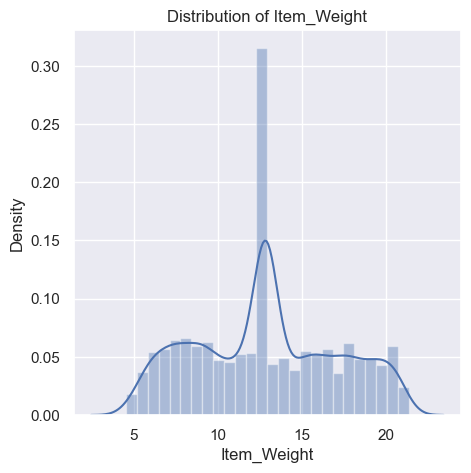

In [18]:
#distribution of "Item_Weight"
plt.figure(figsize=(5,5))
plt.title("Distribution of Item_Weight")
sns.distplot(data["Item_Weight"]);

C:\Users\Shashi Shekhar\AppData\Local\Temp\ipykernel_14300\2672370345.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_Visibility"]);
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


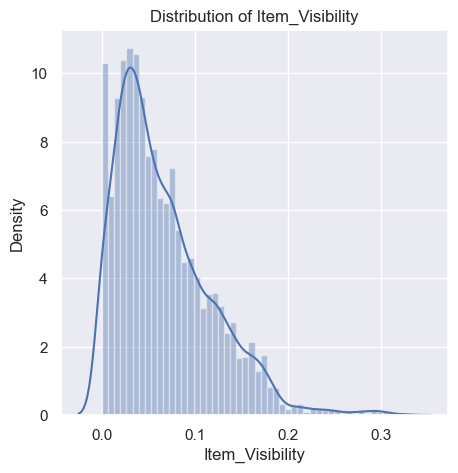

In [19]:
#distribution of "Item_Visibility"
plt.figure(figsize=(5,5))
plt.title("Distribution of Item_Visibility")
sns.distplot(data["Item_Visibility"]);

C:\Users\Shashi Shekhar\AppData\Local\Temp\ipykernel_14300\683009961.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_MRP"]);
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


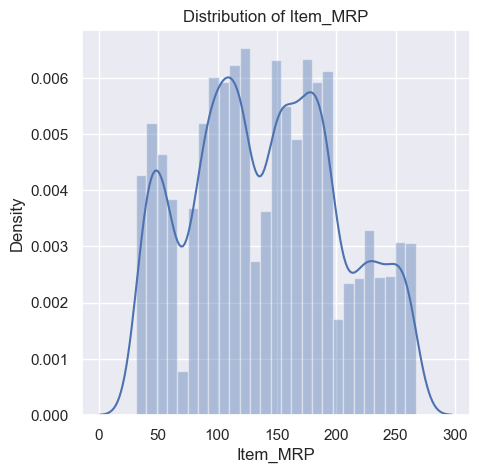

In [20]:
#distribution of "Item_MRP"
plt.figure(figsize=(5,5))
plt.title("Distribution of Item_MRP")
sns.distplot(data["Item_MRP"]);

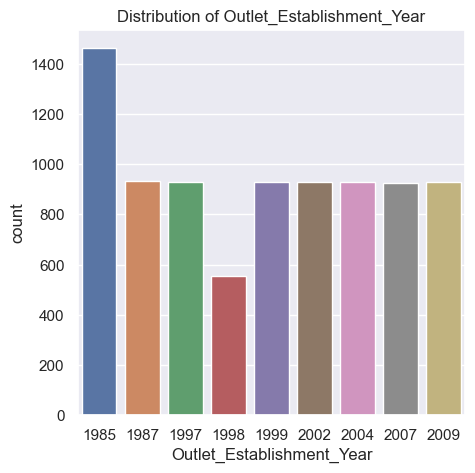

In [21]:
# Distribution of "Outlet_Establishment_Year"
plt.figure(figsize=(5,5))
plt.title("Distribution of Outlet_Establishment_Year")
sns.countplot(x="Outlet_Establishment_Year", data=data);

C:\Users\Shashi Shekhar\AppData\Local\Temp\ipykernel_14300\1297763333.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_Outlet_Sales"]);
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


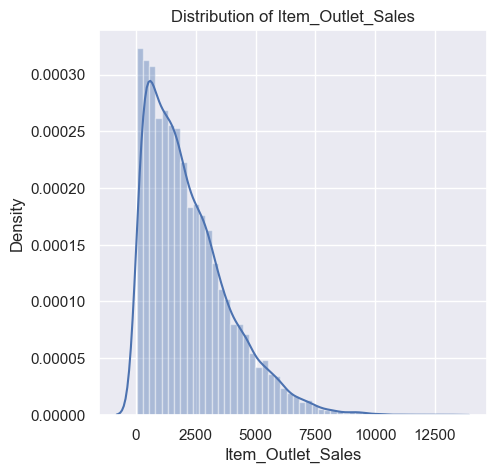

In [22]:
# Distribution of "Item_Outlet_Sales"
plt.figure(figsize=(5,5))
plt.title("Distribution of Item_Outlet_Sales")
sns.distplot(data["Item_Outlet_Sales"]);

#### categorical features of dataset

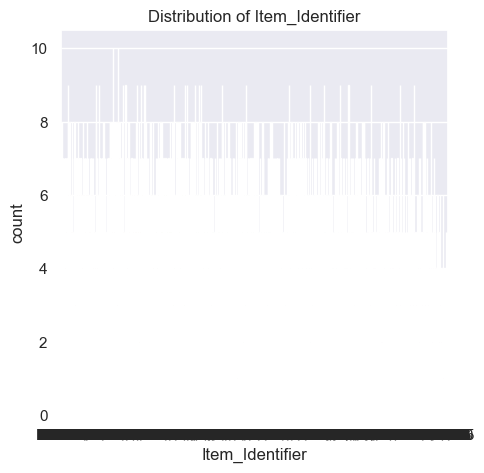

In [23]:
#distribution of "Item_Identifier"
plt.figure(figsize=(5,5))
plt.title("Distribution of Item_Identifier")
sns.countplot(x="Item_Identifier", data=data);

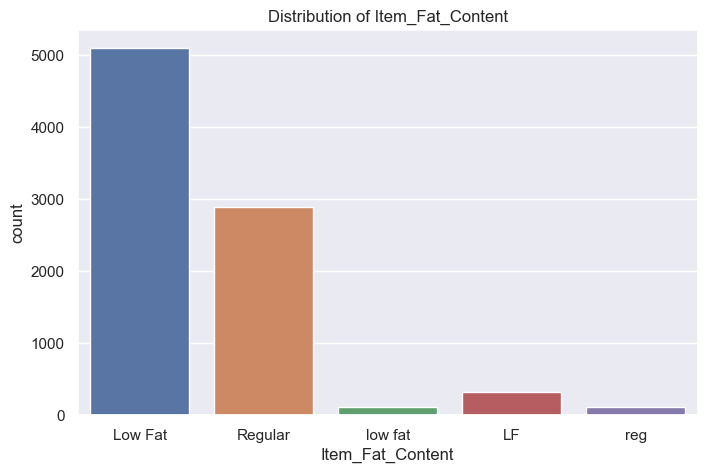

In [24]:
# distribution of "Item_Fat_Content"
plt.figure(figsize=(8,5))
plt.title("Distribution of Item_Fat_Content")
sns.countplot(x="Item_Fat_Content", data=data);

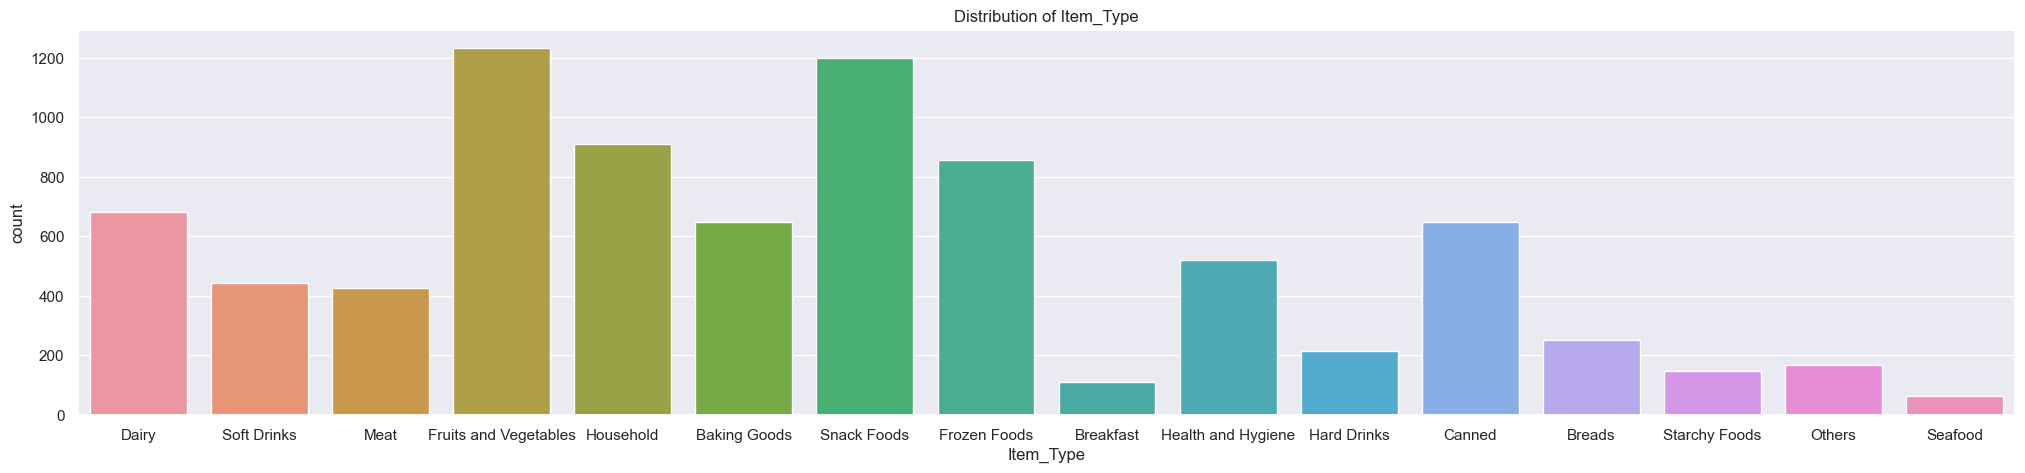

In [25]:
#distribution of "Item_Type"
plt.figure(figsize=(25,5))
plt.title("Distribution of Item_Type")
sns.countplot(x="Item_Type", data=data);

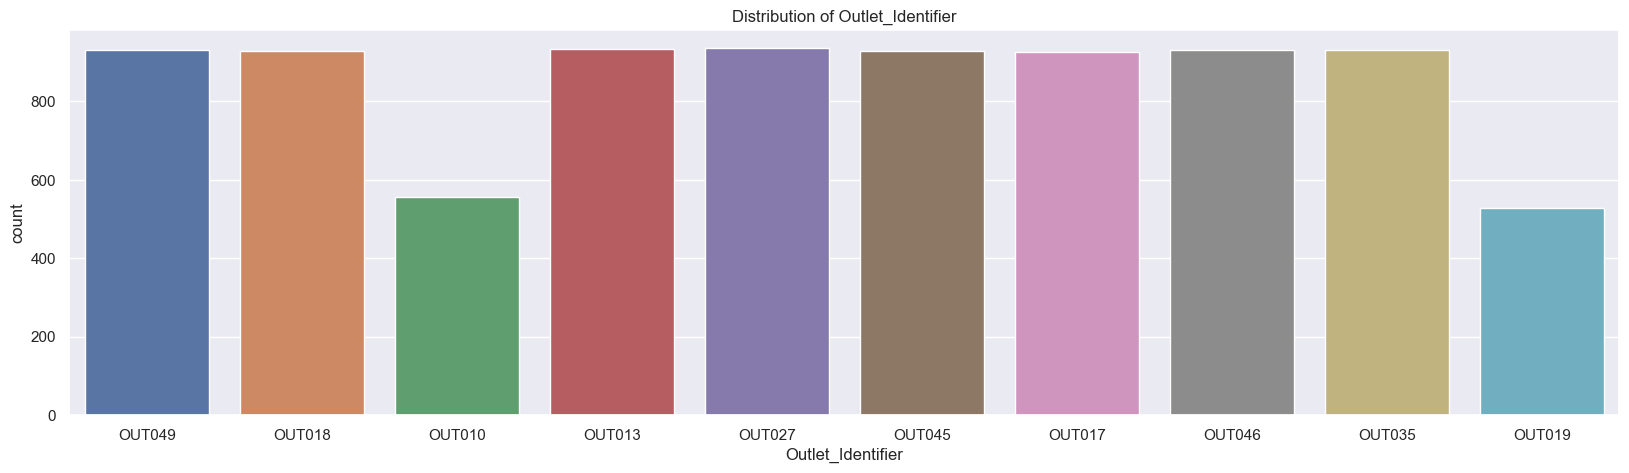

In [26]:
# distribution of "Outlet_Identifier"
plt.figure(figsize=(20,5))
plt.title("Distribution of Outlet_Identifier")
sns.countplot(x="Outlet_Identifier", data=data);

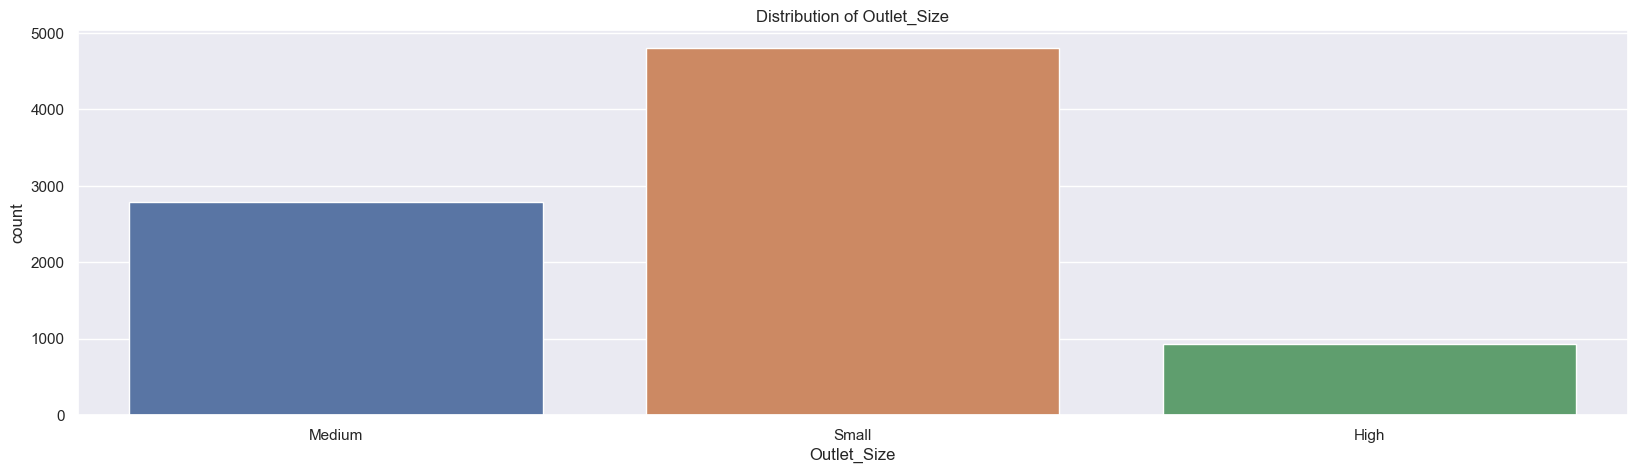

In [53]:
# # distribution of "Outlet_Size"
plt.figure(figsize=(20,5))
plt.title("Distribution of Outlet_Size")
sns.countplot(x="Outlet_Size", data=data);

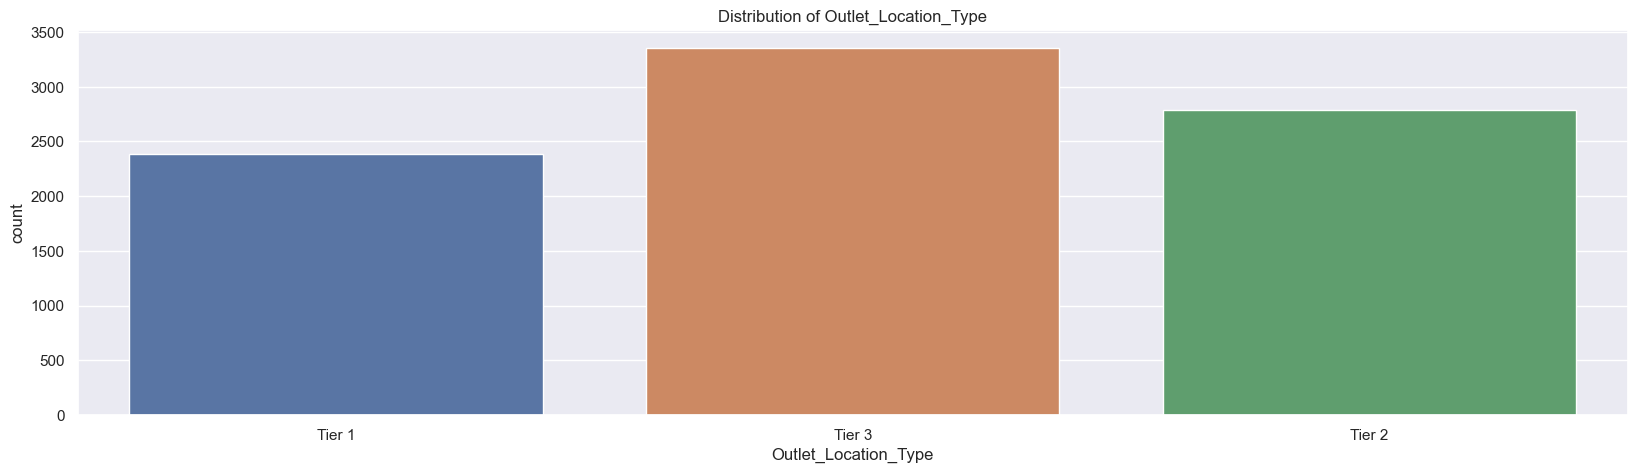

In [28]:
# distribution of "Outlet_Location_Type"
plt.figure(figsize=(20,5))
plt.title("Distribution of Outlet_Location_Type")
sns.countplot(x="Outlet_Location_Type", data=data);

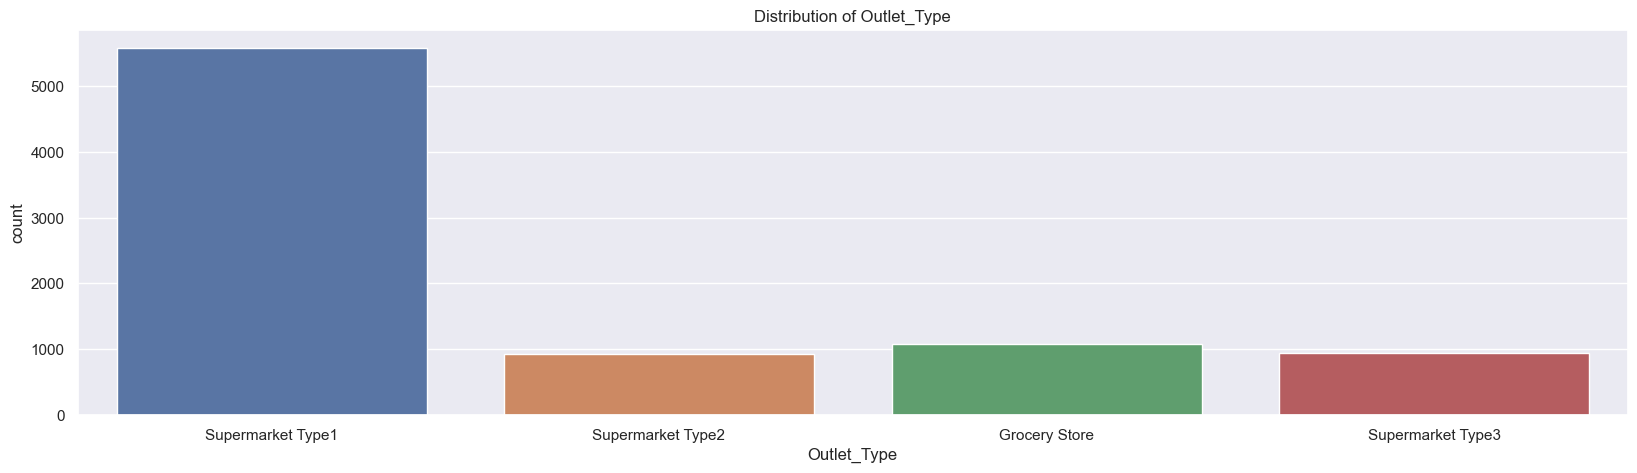

In [29]:
# distribution of "Outlet_Type"
plt.figure(figsize=(20,5))
plt.title("Distribution of Outlet_Type")
sns.countplot(x="Outlet_Type", data=data);

In [30]:
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [54]:
#replcing LF to Low Fat, reg to Regular, low fat to Low Fat as
data.replace({"Item_Fat_Content":{"LF":"Low Fat", "reg":"Regular", "low fat":"Low Fat"}}, inplace=True)

#### label incoding: convert all categorical data to numerica data by label encoder

In [55]:
encoder=LabelEncoder()

In [56]:
data["Item_Identifier"]=encoder.fit_transform(data["Item_Identifier"])
data["Item_Fat_Content"]=encoder.fit_transform(data["Item_Fat_Content"])
data["Item_Type"]=encoder.fit_transform(data["Item_Type"])
data["Outlet_Identifier"]=encoder.fit_transform(data["Outlet_Identifier"])
data["Outlet_Size"]=encoder.fit_transform(data["Outlet_Size"])
data["Outlet_Location_Type"]=encoder.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"]=encoder.fit_transform(data["Outlet_Type"])

In [58]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#### Splitting the dataset into features and target

In [59]:
X=data.drop(columns = ["Item_Outlet_Sales"], axis=1)
Y=data["Item_Outlet_Sales"]

In [61]:
print(X.shape, Y.shape)

(8523, 11) (8523,)


In [62]:
#spliting the data into train, test as:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6818, 11) (1705, 11) (6818,) (1705,)


#### machine learning by model traing using XGBoost regressor

In [63]:
model = XGBRegressor()

In [64]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### evaluation

In [65]:
# prediction on training data
train_data_prediction = model.predict(X_train)
train_data_prediction

array([2241.8008, 2784.4749, 3348.1802, ..., 2619.9922, 1810.6472,
       2076.5325], dtype=float32)

In [66]:
# R squared error value as
r2_train=metrics.r2_score(Y_train, train_data_prediction)
r2_train

0.8762174618111388

In [67]:
# prediction on test data
test_data_prediction = model.predict(X_test)
test_data_prediction

array([2350.1606, 1861.6439, 1700.9556, ..., 2857.3364, 2405.3838,
       3876.3467], dtype=float32)

In [68]:
# R squared error value as
r2_test=metrics.r2_score(Y_test, test_data_prediction)
r2_test

0.5017253991620692